In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

In [2]:
# loans_tr 데이터를 load
dataset = pd.read_csv('loans_tr.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


In [4]:
dataset.head(5)

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
dataset["not.fully.paid"].mean()

0.1595943110282117

In [6]:
dataset["pub.rec"].mean()

0.062252273257169505

In [7]:
print(dataset.shape)

(8578, 15)


In [8]:
pd.set_option('precision', 3)
pd.set_option('display.width', 120)
print(dataset.describe())

       Unnamed: 0  credit.policy  int.rate  installment  log.annual.inc       dti      fico  days.with.cr.line  \
count    8578.000       8578.000  8578.000     8578.000        8578.000  8578.000  8578.000           8578.000   
mean     4798.573          0.804     0.123      318.093          10.932    12.622   710.750           4547.757   
std      2766.006          0.397     0.027      206.994           0.616     6.882    38.088           2494.932   
min         0.000          0.000     0.060       15.670           7.548     0.000   612.000            178.958   
25%      2399.250          1.000     0.104      163.570          10.556     7.242   682.000           2792.781   
50%      4804.500          1.000     0.122      267.740          10.929    12.660   707.000           4110.042   
75%      7193.500          1.000     0.141      430.750          11.294    17.960   737.000           5729.958   
max      9576.000          1.000     0.216      940.140          14.528    29.960   827.

In [9]:
print(dataset.corr(method='pearson'))

                   Unnamed: 0  credit.policy  int.rate  installment  log.annual.inc    dti   fico  days.with.cr.line  \
Unnamed: 0              1.000         -0.687     0.283        0.051           0.010  0.096 -0.187             -0.025   
credit.policy          -0.687          1.000    -0.295        0.062           0.037 -0.092  0.349              0.094   
int.rate                0.283         -0.295     1.000        0.274           0.057  0.225 -0.717             -0.121   
installment             0.051          0.062     0.274        1.000           0.450  0.045  0.089              0.185   
log.annual.inc          0.010          0.037     0.057        0.450           1.000 -0.056  0.113              0.335   
dti                     0.096         -0.092     0.225        0.045          -0.056  1.000 -0.242              0.057   
fico                   -0.187          0.349    -0.717        0.089           0.113 -0.242  1.000              0.262   
days.with.cr.line      -0.025          0

In [10]:
del dataset['delinq.2yrs']

In [11]:
del dataset['days.with.cr.line']

In [12]:
del dataset['log.annual.inc']

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [14]:
labelencoder = LabelEncoder()

In [15]:
dataset['purpose'] = labelencoder.fit_transform(dataset['purpose'])

In [16]:
dataset.head(5)

,Unnamed: 0,credit.policy,purpose,int.rate,installment,dti,fico,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
0,0,1,2,0.119,829.10,19.48,737,28854,52.1,0,0,0
1,1,1,1,0.107,228.22,14.29,707,33623,76.7,0,0,0
2,2,1,2,0.136,366.86,11.63,682,3511,25.6,1,0,0
3,3,1,2,0.101,162.34,8.10,712,33667,73.2,1,0,0
4,4,1,1,0.143,102.92,14.97,667,4740,39.5,0,0,0


In [17]:
print(dataset.corr(method='pearson'))

                Unnamed: 0  credit.policy  purpose  int.rate  installment    dti   fico  revol.bal  revol.util  \
Unnamed: 0           1.000         -0.687   -0.010     0.283        0.051  0.096 -0.187      0.137       0.091   
credit.policy       -0.687          1.000    0.017    -0.295        0.062 -0.092  0.349     -0.188      -0.106   
purpose             -0.010          0.017    1.000     0.117        0.154 -0.054  0.057      0.043      -0.063   
int.rate             0.283         -0.295    0.117     1.000        0.274  0.225 -0.717      0.095       0.470   
installment          0.051          0.062    0.154     0.274        1.000  0.045  0.089      0.230       0.076   
dti                  0.096         -0.092   -0.054     0.225        0.045  1.000 -0.242      0.186       0.341   
fico                -0.187          0.349    0.057    -0.717        0.089 -0.242  1.000     -0.014      -0.542   
revol.bal            0.137         -0.188    0.043     0.095        0.230  0.186 -0.014 

In [18]:
plt.rcParams['figure.figsize'] = (15,15)

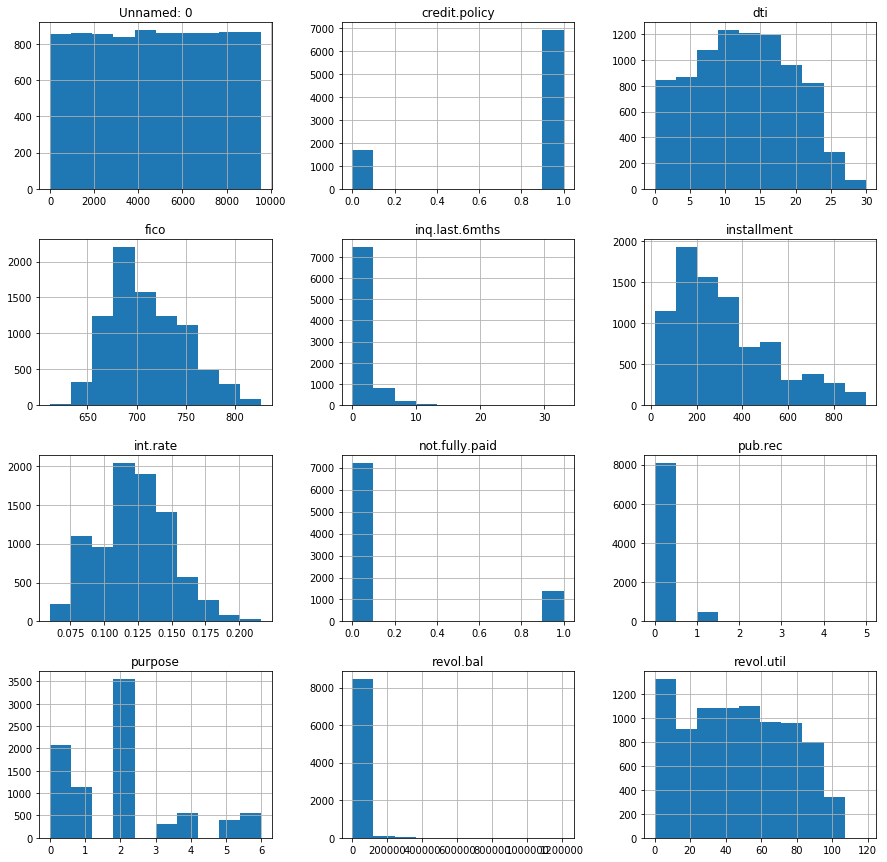

In [19]:
dataset.hist()
plt.show()

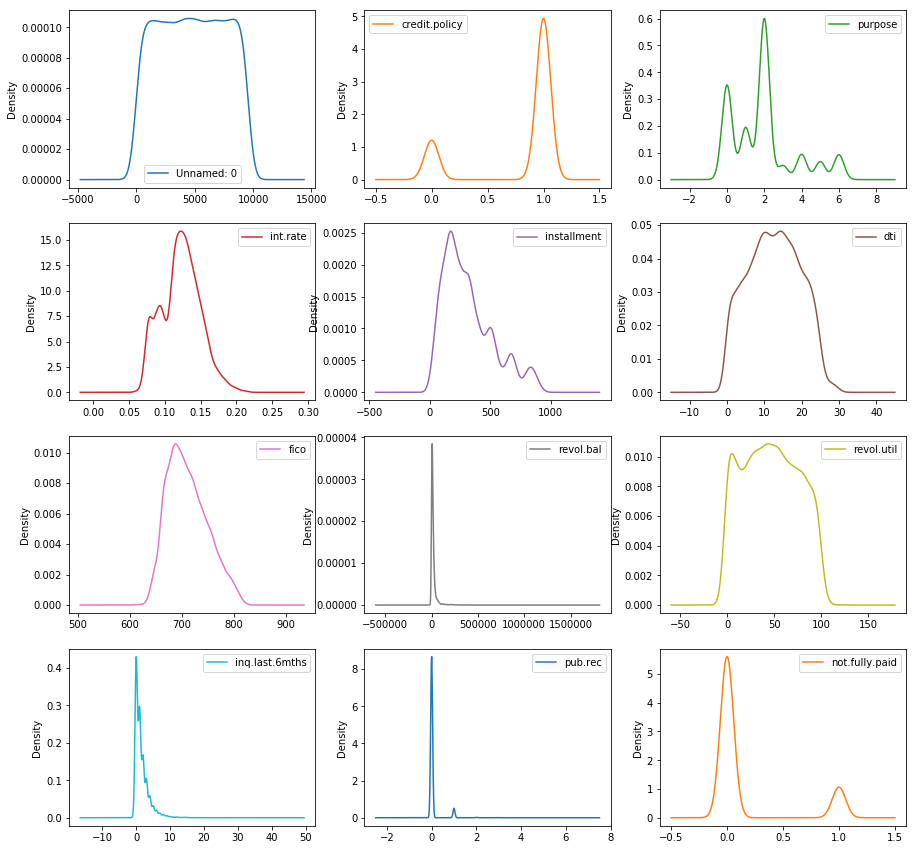

In [20]:
dataset.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

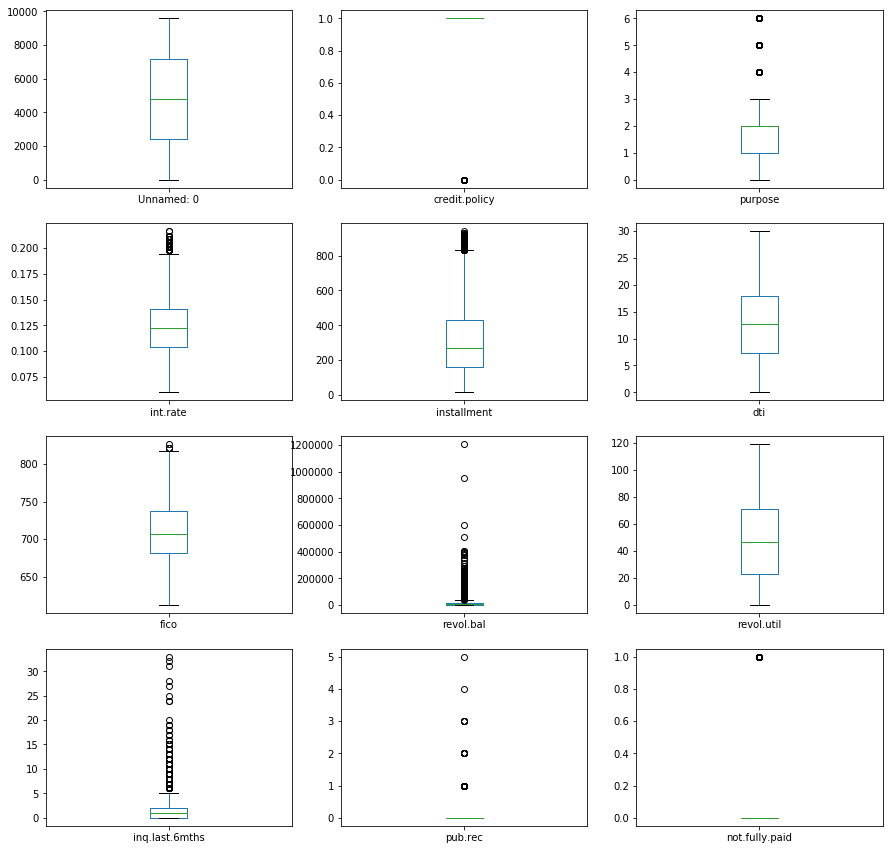

In [21]:
dataset.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

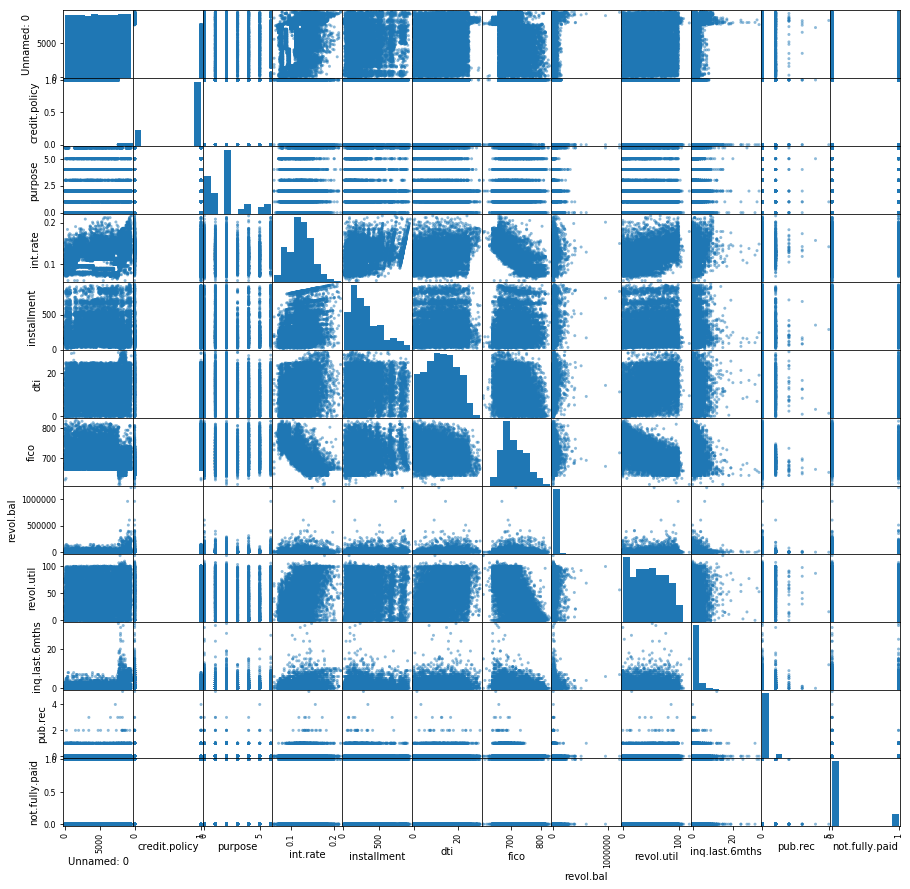

In [22]:
scatter_matrix(dataset)
plt.show()

In [23]:
# Exploratory Data Aanalysis


In [24]:
# X_data, y_data division
# train data, test data division
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:10]
Y = array[:,10]
validation_size = 0.20
seed = 15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [25]:
# Compare Algorithms - model selection
num_folds = 10
seed = 7
scoring = 'accuracy'

In [26]:
# Compare Algorithms - model selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [27]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_sampl

In [28]:
# cross validaton을 통해 optimal model selection
final_pipelines = []
final_pipelines.append(('Tuned_KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_neighbors = 11))])))
final_pipelines.append(('Tuned_RF', Pipeline([('RF', RandomForestClassifier(max_features = 'sqrt', n_estimators = 20))])))

In [29]:
final_pipelines

[('Tuned_KNN', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('KNN',
                   KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                        metric='minkowski', metric_params=None,
                                        n_jobs=None, n_neighbors=11, p=2,
                                        weights='uniform'))],
           verbose=False)), ('Tuned_RF', Pipeline(memory=None,
           steps=[('RF',
                   RandomForestClassifier(bootstrap=True, class_weight=None,
                                          criterion='gini', max_depth=None,
                                          max_features='sqrt',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                       

In [30]:
cm = []
accuracy = []
names = []
for name, model in final_pipelines:
    model.fit(X_train, Y_train)
    Y_test_hat = model.predict(X_test)
    cm.append(confusion_matrix(Y_test, Y_test_hat))
    accuracy.append(accuracy_score(Y_test, Y_test_hat))
    names.append(name)

In [31]:
names

['Tuned_KNN', 'Tuned_RF']

In [32]:
cm

[array([[1619,    0,    0,    0],
        [  92,    0,    0,    0],
        [   2,    0,    0,    0],
        [   3,    0,    0,    0]], dtype=int64),
 array([[1617,    2,    0,    0],
        [  92,    0,    0,    0],
        [   2,    0,    0,    0],
        [   3,    0,    0,    0]], dtype=int64)]

In [33]:
accuracy

[0.9434731934731935, 0.9423076923076923]

In [34]:
# pipeline을 활용해서 scaling하고 optimal model selection

In [35]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [36]:
pipelines

[('ScaledLR', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('LR',
                   LogisticRegression(C=1.0, class_weight=None, dual=False,
                                      fit_intercept=True, intercept_scaling=1,
                                      l1_ratio=None, max_iter=100,
                                      multi_class='warn', n_jobs=None,
                                      penalty='l2', random_state=None,
                                      solver='warn', tol=0.0001, verbose=0,
                                      warm_start=False))],
           verbose=False)), ('ScaledLDA', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('LDA',
                   LinearDiscriminantAnalysis(n_components=None, priors=None,
                                              shrinkage=No

In [37]:
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.940978 (0.009047)
ScaledLDA: 0.937772 (0.009480)
ScaledKNN: 0.938791 (0.008386)
ScaledCART: 0.880644 (0.011604)
ScaledNB: 0.908772 (0.012786)
ScaledRF: 0.940249 (0.009160)


In [38]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('RF', RandomForestClassifier())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold( n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.941561 (0.008981)
ScaledLDA: 0.937772 (0.009480)
ScaledKNN: 0.939520 (0.008909)
ScaledCART: 0.882540 (0.008140)
ScaledNB: 0.908772 (0.012786)
ScaledRF: 0.939520 (0.008314)


In [39]:
# Tune scaled-KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kf = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kf)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.941562 using {'n_neighbors': 15}


In [40]:
# ensemble 과 grid search를 활용한 model selection

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.941708 using {'max_features': 'sqrt', 'n_estimators': 30}


In [43]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.941562 using {'max_features': 'log2', 'n_estimators': 35}


In [69]:
best_RF = RandomForestClassifier(max_features='sqrt', n_estimators=30)
best_RF.fit(X_train, Y_train)
best_RF.feature_importances_

array([0.14826708, 0.00641434, 0.04169004, 0.11213261, 0.13125349,
       0.13808883, 0.08973762, 0.13576578, 0.14016057, 0.05648965])

In [45]:
dataset.columns[0:-1]

Index(['Unnamed: 0', 'credit.policy', 'purpose', 'int.rate', 'installment', 'dti', 'fico', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'pub.rec'],
      dtype='object')

In [46]:
# final test score - test data

In [47]:
datatest = pd.read_csv('loans_ts.csv')

In [48]:
datatest.head(5)

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,8150,0,small_business,0.130,505.34,11.408,10.24,672,2250.000,4162,68.4,14,0,1,1
1,7086,1,credit_card,0.106,618.64,11.290,13.29,737,5070.000,14462,36.1,1,0,0,0
2,9374,0,all_other,0.153,139.27,10.556,8.34,667,3810.042,1151,9.8,6,0,0,0
3,7439,1,home_improvement,0.157,280.09,10.874,7.36,662,4770.000,10973,87.8,0,1,0,1
4,5345,1,credit_card,0.153,870.39,11.727,16.65,707,10590.000,40413,85.6,0,0,0,0


In [49]:
del datatest['delinq.2yrs']
del datatest['days.with.cr.line']
del datatest['log.annual.inc']

In [50]:
datatest['purpose'] = labelencoder.fit_transform(datatest['purpose'])

In [51]:
datatest.head(5)

,Unnamed: 0,credit.policy,purpose,int.rate,installment,dti,fico,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
0,8150,0,6,0.130,505.34,10.24,672,4162,68.4,14,1,1
1,7086,1,1,0.106,618.64,13.29,737,14462,36.1,1,0,0
2,9374,0,0,0.153,139.27,8.34,667,1151,9.8,6,0,0
3,7439,1,4,0.157,280.09,7.36,662,10973,87.8,0,0,1
4,5345,1,1,0.153,870.39,16.65,707,40413,85.6,0,0,0


In [52]:
array1 = datatest.values
X_test_t = array1[:,0:10]
Y_test_t = array1[:,10]

In [66]:
cm_t = []
accuracy_t = []
names_t = []
for name, model in pipelines:
    model.fit(X_train, Y_train)
    Y_test_hat = model.predict(X_test_t)
    cm_t.append(confusion_matrix(Y_test_t, Y_test_hat))
    accuracy_t.append(accuracy_score(Y_test_t, Y_test_hat))
    names_t.append(name)
print(accuracy_t)

[0.939, 0.933, 0.935, 0.883, 0.902, 0.935]


In [68]:
cm_t

[array([[939,   0],
        [ 61,   0]], dtype=int64), array([[933,   0,   6],
        [ 60,   0,   1],
        [  0,   0,   0]], dtype=int64), array([[935,   4],
        [ 61,   0]], dtype=int64), array([[874,  64,   1],
        [ 52,   9,   0],
        [  0,   0,   0]], dtype=int64), array([[897,  38,   3,   1],
        [ 56,   5,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]], dtype=int64), array([[935,   4],
        [ 61,   0]], dtype=int64)]

In [67]:
names_t

['ScaledLR', 'ScaledLDA', 'ScaledKNN', 'ScaledCART', 'ScaledNB', 'ScaledRF']

In [57]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [58]:
lr_model = LinearRegression()

In [59]:
lr_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
predictions = lr_model.predict(X_test_t)

In [71]:
predictions[:10]

array([0.20265067, 0.02659459, 0.13707199, 0.11385913, 0.04205288,
       0.04899878, 0.06679296, 0.07938988, 0.08786512, 0.07866039])

In [73]:
print('MAE :', metrics.mean_absolute_error(Y_test_t, predictions))
print('MSE :', metrics.mean_squared_error(Y_test_t, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test_t, predictions))) 

MAE : 0.11538324967382362
MSE : 0.05565157296176105
RMSE : 0.2359058561413028
